In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [86]:
bar_color = ['#489fb5','#ffa62b']

In [1]:
%run 0-1_process.ipynb

In [6]:
df.columns

Index(['mes_ultimo_unico_robo', 'metodo', 'hora', 'lugar', 'celular',
       'efectivo_tarjetas', 'articulos_de_uso_personal', 'dispositivos',
       'otra_pertenencia', 'arma_fuego', 'arma_blanca', 'otros_objetos',
       'fuerza_fisica', 'drogas_sustancias', 'hizo_llamada', 'denuncia',
       'lugar_denuncia', 'autoridad', 'razon_denuncia', 'buena_atencion',
       'razon_de_satisfaccion', 'razon_no_denuncia', 'recuperacion_objeto',
       'year'],
      dtype='object')

In [47]:
def values_and_names(feature):
    names = []
    values = []
    for keys,value in df[feature].value_counts().items():
        names.append(keys)
        values.append(value)
    return names,values

(['si', 'no'], [12288, 3968])

Text(0.5, 1.0, 'dispositivos electronicos')

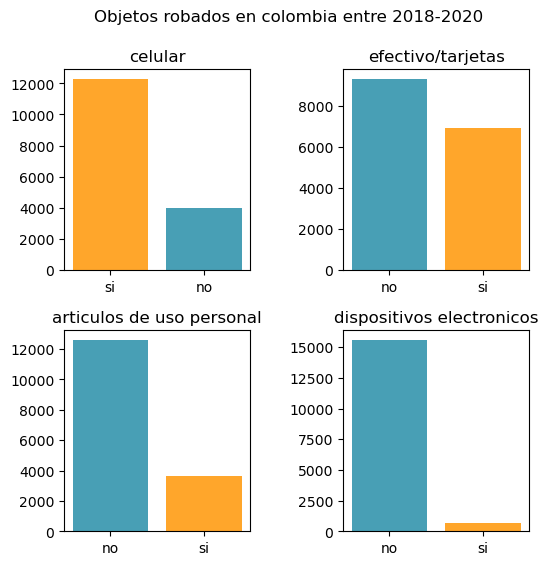

In [88]:
cel_names,cel_values = values_and_names('celular')
et_names,et_values = values_and_names('efectivo_tarjetas')
ar_names,ar_values = values_and_names('articulos_de_uso_personal')
dis_names,dis_values = values_and_names('dispositivos')

fig,axs = plt.subplots(2,2,figsize=(6,6))
fig.subplots_adjust(wspace=0.5,hspace=0.3)
fig.suptitle('Objetos robados en colombia entre 2018-2020')
axs[0,0].bar(cel_names,cel_values,color=['#ffa62b','#489fb5'])
axs[0,0].set_title('celular')
axs[0,1].bar(et_names,et_values,color=bar_color)
axs[0,1].set_title('efectivo/tarjetas')
axs[1,0].bar(ar_names,ar_values,color=bar_color)
axs[1,0].set_title('articulos de uso personal')
axs[1,1].bar(dis_names,dis_values,color=bar_color)
axs[1,1].set_title('dispositivos electronicos')



In [53]:
df.columns

Index(['mes_ultimo_unico_robo', 'metodo', 'hora', 'lugar', 'celular',
       'efectivo_tarjetas', 'articulos_de_uso_personal', 'dispositivos',
       'otra_pertenencia', 'arma_fuego', 'arma_blanca', 'otros_objetos',
       'fuerza_fisica', 'drogas_sustancias', 'hizo_llamada', 'denuncia',
       'lugar_denuncia', 'autoridad', 'razon_denuncia', 'buena_atencion',
       'razon_de_satisfaccion', 'razon_no_denuncia', 'recuperacion_objeto',
       'year'],
      dtype='object')